# Tarea 2
##Física computacional 2024-2

## 1. VIGA VOLADIZA

Una viga voladiza es una estructura que esta soportada solo uno de sus lados. La ecuacion que describe la frecuencia de oscilacion de la viga es la siguiente:

$$ f(\beta) = \sinh(\beta)\sin(\beta) - 1. $$

Donde $f_{n}$ es la frecuencia n-ésima, $m$ la masa de la viga, $L$ la logitud de la viga, $E$ es la eslasticidad, $I$ el momento de inercia de la seccion transversal y $\beta_{n} = (2\pi f_{n})^{2} \frac{mL^{3}}{EI}$.

Supongamos que la viga en cuestión tiene las siguientes características:
$m = 4.41$ kg, $L = 0.9$ m, $E = 200x10^{9}$Pa e $I = 3.255 x10^{-8}$.

### a) Determina dos frecuencias para la viga tales que $f(\beta)=0$.
*Por favor verifica que las frecuencias tengan significado fisico.

### b) Discute con tus propias palabras lo que sucedería si la viga lograra tales frecuencias.

### c) Usa todos los métodos que conoces y despliega los resultados con los errores totales correspondientes. Explica cuál es el mejor método y por qué. Además de, en cada método, indicar cómo se calcula el error.

In [ ]:
#a)
import numpy as np

#Definimos la función para la cual encontraremos las raices
def f(beta):
  return np.sinh(beta)*np.sin(beta)-1

#Se copia la función secante realizada de tarea
def secante(f, x0, x1, epsilon=1e-15):
    dx = 2 * epsilon
    contador = 0
    while dx > epsilon and f(x1) - f(x0) != 0:  # Se pone una condición por si truena el código
        x2 = x1 - ((x1 - x0) / (f(x1) - f(x0))) * f(x1)  # x2=xn+1
        dx = abs(x0 - x1)
        x0 = x1
        x1 = x2
        contador += 1

    return x2, contador

# Definimos los parámetos
m = 4.41  #(kg)
L = 0.9   #(m)
E = 200e9 #(Pa)
I = 3.255e-8 #(m^4)


#Definimos la función que nos ayudará a determinar el valor de la frecuencia
def fn(x):
  return  np.sqrt(x) * np.sqrt(E * I / ((m * L**3)*(2 * np.pi)**2))

In [ ]:
#Guardamos los valores de ambas raíces encontradas y las mostramos en pantalla

root1, _= secante(f, 2, 1.99)  # Ignoramos el contador con _
root2, _ = secante(f, 3.5, 2.5)  # Ignoramos el contador con _
print("Raíces encontradas:", root1,"," ,root2)

Raíces encontradas: 1.005728176525621 , 3.046149118859594


In [ ]:
#Imprimimos el resultado final
print("Las frecuencias encontradas para f1 y f2 son:", fn(root1),",",fn(root2),'Hz')

Las frecuencias encontradas para f1 y f2 son: 7.18237168241355 , 12.499802377751598 Hz


### b)¿Qué sucedería si esas vigas tuvieran esa frecuencia?
A estas frecuencias algo bajas la viga experimentará oscilaciones naturales o modos de vibración característicos. En el caso de los modos de vibración dependerá de la ecuación diferencial cuando esta se deforma bajo la carga.

A altas frecuencias, es posible que ocurran fenómenos, como la resonancia.Esto podría provocar daños estructurales o fallas si no se controla adecuadamente para ello es importante controlar las frecuencias de oscilación de la viga.

In [ ]:
#C) importemos en primer lugar todas las funciones para hacer posteriormente el análisis

def busqueda_incremental(f,a,b,h):
  x0=a
  x1=a+h
  contador=0
  while f(x0)*f(x1)>0:
    x0=x1
    x1=x0+h
    if x1>b:
      return ("No hay raíz")
      break
    contador += 1
  return x1, contador

#Busqueda bisección
def busquedaBiseccion(f, a, b, epsilon=1e-15):
    x0 = a
    x1 = b
    x2 = (x0 + x1) / 2
    contador = 0

    while f(x0) * f(x1) < 0 and abs(x1 - x0) > epsilon:
        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2

        x2 = (x0 + x1) / 2
        contador += 1

    return x2, contador

def newton(f, df, x0, epsilon):
    dx = 2 * epsilon
    contador = 0
    while dx > epsilon:
        if df(x0) == 0:
            print("La derivada en el punto actual es cero. No se puede continuar.")
            return None
        x1 = x0 - f(x0) / df(x0)
        dx = abs(x0 - x1)
        x0 = x1
        contador += 1
    return x1, contador


from math import *

def Ridders(f,x1,x2,epsilon=1e-15):

  dx=3*epsilon
  contador=0
  while dx>epsilon:
    x3=(x1+x2)/2
    f1=f(x1)
    f2=f(x2)
    f3=f(x3)

    if f1 < f2:
      x4=x3- (x3-x1)*f3/sqrt(f3**2-f1*f2)
    else:
      x4=x3+(x3-x1)*f3/sqrt(f3**2-f1*f2)
    dx=abs(x4-x3)
    x1=x3
    x2=x4
    contador+=1

  return x4,contador

In [ ]:
# Resultados, número de pasos de los métodos, errores para la primera raíz
import pandas as pd
df = lambda x: np.sin(x)*np.cosh(x)+np.sinh(x)*np.cos(x)
valor_real=1.0057281773212
resultados = {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método secante", "Método de Ridders"],
    "Resultado": [busqueda_incremental(f, 1, 2.5, 1e-6)[0], busquedaBiseccion(f, 1.05, 2)[0], newton(f, df, 1.9, 1e-6)[0], secante(f, 1.9, 2, 1e-6)[0], Ridders(f,1.9,2,1e-6)[0]],
    "Pasos": [busqueda_incremental(f, 1, 2.5, 1e-6)[1], busquedaBiseccion(f, 1.05, 2)[1], newton(f, df, 1.9, 1e-6)[1], secante(f, 1.9, 2, 1e-6)[1], Ridders(f,1.9,2,1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}
#Guardamos el DataFrame en una variable
df_resultados = pd.DataFrame(resultados)
#Agregamos la columna correspondiente al error
df_resultados['Error %'] = np.abs(df_resultados['Resultado'] - valor_real)

# Mostrar el DataFrame
pd.DataFrame(df_resultados)



,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,1.005729,5728,lineal,8.226783e-07
1,Búsqueda Bisección,1.525000,0,lineal,5.192718e-01
2,Método de Newton,1.005728,5,cuadrática,7.955789e-10
3,Método secante,1.005728,7,superlineal,7.955789e-10
4,Método de Ridders,1.005728,22,cuadrática,7.955787e-10


In [ ]:
# Resultados, número de pasos de los métodos, errores para la segunda raíz
import pandas as pd
df = lambda x: np.sin(x)*np.cosh(x)+np.sinh(x)*np.cos(x)
valor_real=3.046149064328
resultados = {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método de secante","Método de Ridders"],
    "Resultado": [busqueda_incremental(f, 1.5, 3.3, 1e-6)[0], busquedaBiseccion(f, 3.5, 2.5)[0], newton(f, df, 2.5, 1e-6)[0], secante(f, 3.5, 2.5, 1e-6)[0],Ridders(f,3.5,2.5,1e-6)[0]],
    "Pasos": [busqueda_incremental(f, 1.5, 3.3, 1e-6)[1], busquedaBiseccion(f, 3.05, 2)[1], newton(f, df, 2.5, 1e-6)[1], secante(f, 3.5, 2.5, 1e-6)[1],Ridders(f,3.5,2.5,1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}

df_resultados = pd.DataFrame(resultados)

df_resultados['Error %'] = np.abs(df_resultados['Resultado'] - valor_real)
# Mostrar el DataFrame
pd.DataFrame(df_resultados)

,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,3.046150,1546149,lineal,9.357771e-07
1,Búsqueda Bisección,3.046149,51,lineal,5.453159e-08
2,Método de Newton,3.046149,8,cuadrática,5.453159e-08
3,Método de secante,3.046149,10,superlineal,5.453159e-08
4,Método de Ridders,3.046149,17,cuadrática,5.453159e-08


### c.2) ¿Cuál es el mejor método?

Como tal, no existe un parámetro para afirmar qué método es mejor que otro. En lo que sí podemos y debemos guiarnos es en el hecho de la eficiencia al momento de resolver problemas. Cualquier método es susceptible a tener errores inherentes dependiendo de cada problema. En este caso, se podría decir que el mejor método sería el de Newton, ya que obtenemos una precisión muy buena con un número pequeño de pasos. El error que estamos presentando es de una magnitud de e-9. A su vez, el método de Ridders se presenta como una buena opción, solamente que realiza dos pasos más que el anterior. La búsqueda incremental posee una cantidad exagerada de pasos y, por tanto, un tiempo de ejecución bastante tardado, mientras que el método de bisección es el peor, teniendo un error de cerca del 50 por ciento en el primer resultado.

### c.3) ¿Cómo se calculó el error en cada método?

Se definió el valor real de la raíz esperada, para ello nos apoyamos en un software de gráficas. Creamos un diccionario con los métodos, resultados y número de pasos con la finalidad de convertirlos en un DataFrame. Una vez creado el DataFrame, lo guardamos con un nombre y agregamos una columna. Esta columna fue realizada tomando el módulo de numpy del valor absoluto y restándole el resultado obtenido en cada método.

## 2. EFICIENCIA DE UN MOTOR

La eficiencia del motor esta dada por la siguiente expresion:

$\eta = \frac{\ln(T_{2}/T_{1}) + (1 - T_{2}/T_{1})} {\ln(T_{2}/T_{1}) - (1 - T_{2}/T_{1})/(\gamma -1) }.$

### a) Encuentra el valor de $T_{2}$ que logra una eficiencia del 30%, considera $T_{1}$ = 400K, $\gamma = 5/3$. ¿Qué tipo de gas hace funcionar al motor?

### b) Repite el proceso para $\gamma = 7/5$.

### c) Realiza una gráfica donde muestres la variación de la eficiencia al aumentar $T_{2}$. Discute la grafica y el significado físico del sistema.

### d) Usa todos los métodos que conoces y despliega los resultados con los errores totales correspondientes. Explica cuál es el mejor método y por qué. Además de, en cada método, indicar cómo se calcula el error.

In [ ]:
#a) primeramente definimos la función que nos ayudará a encontrar el valor de la raíz, que expresará la temperatura T2
def f2(T2):
  return (np.log(T2/T1) + (1 - T2/T1)) / (np.log(T2/T1) - ((1 - T2/T1)/(gamma - 1)))-eta

In [ ]:
#Usaremos método de la secante para no derivar, ya que es el segundo método más eficaz
#Definimos los valores a utilizar
T1=400 #Kelvin
eta=0.3
gamma=5/3
a=secante(f2,1,2, 1e-6)
print("T2 para gamma=5/3 es:",a[0],"k")

T2 para gamma=5/3 es: 73.90234362079396 k


#### ¿Qué tipo de gas hace funcionar el motor?
Es un gas diatómico, podría ser oxígeno, nitrógeno, hidrógeno, etc.

In [ ]:
#b)
gamma=7/5
b=secante(f2,1,10, 1e-6)
print("T2 para gamma=7/5 es:",b[0],"k")

T2 para gamma=7/5 es: 42.942098556316346 k


#### ¿Qué tipo de gas hace funcionar el motor?
Es un gas del tipo monoatómico por el valor de la gamma de 7/5.

<ipython-input-10-eb54d0b2e65a>:5: RuntimeWarning: invalid value encountered in log
  eta=(np.log(T2/T1) + (1 - T2/T1)) / (np.log(T2/T1) - ((1 - T2/T1)/(gamma - 1)))


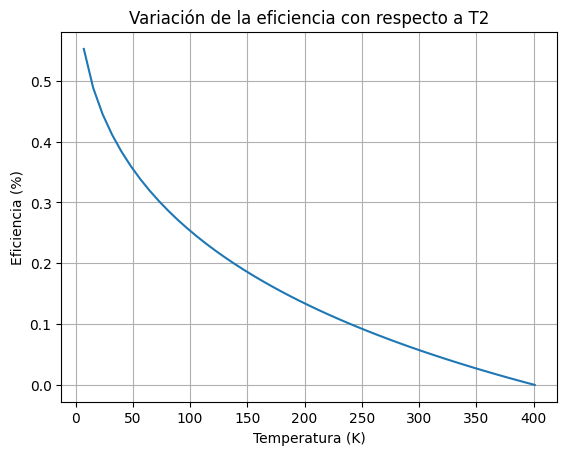

In [ ]:
#c)
import matplotlib.pyplot as plt
T2=np.linspace(-1,401)
gamma=5/3
eta=(np.log(T2/T1) + (1 - T2/T1)) / (np.log(T2/T1) - ((1 - T2/T1)/(gamma - 1)))

plt.plot(T2, eta)
plt.xlabel('Temperatura (K)')
plt.ylabel('Eficiencia (%)')
plt.title('Variación de la eficiencia con respecto a T2')
plt.grid(True)
plt.show()

#### ¿Qué ocurre en la gráfica?
La eficiencia decrece con el logaritmo de \( $T_2$ \) debido a la naturaleza de la relación logarítmica en la expresión de eficiencia. A medida que \( $T_2$ \) aumenta, el logaritmo natural \( $\ln(T_2/T_1)$ \) crece más lentamente, mientras que el término lineal \( $1 - T_2/T_1$ \) disminuye. Esto resulta en una disminución general de la eficiencia, ya que el efecto del logaritmo se vuelve menos significativo en comparación con el término lineal, según lo evidencia la expresión dada para la eficiencia del motor. Por lo tanto, a medida que \( $T_2$ \) aumenta, la eficiencia del motor tiende a disminuir.



In [ ]:
#d)
#Mostrar los resultados por cada método
T1=400 #Kelvin
eta=0.3
gamma=5/3
valor_real1=73.9023436206738
df2= lambda x: (4000* (-400 + x + x *np.log(400) - x *np.log(x)))/(x* (3 *(-400 + x) + 800 *log(x/400))**2)
resultados2= {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método de secante","Método de Ridders"],
    "Resultado": [busqueda_incremental(f2, 20, 100, 1e-3)[0], busquedaBiseccion(f2, 20, 100,1e-6)[0], newton(f2, df2, 100, 1e-6)[0], secante(f2, 1, 2, 1e-6)[0],Ridders(f2,2,100,1e-6)[0]],
    "Pasos": [busqueda_incremental(f2, 20, 100, 1e-3)[1], busquedaBiseccion(f2, 20, 100,1e-6)[1], newton(f2, df2, 100, 1e-6)[1], secante(f2, 1, 2, 1e-6)[1],Ridders(f2,2,100,1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}
df_resultados11 = pd.DataFrame(resultados2)

df_resultados11['Error %'] = np.abs(df_resultados11['Resultado'] - valor_real1)
# Mostrar el DataFrame
pd.DataFrame(df_resultados11)


,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,73.903000,53902,lineal,6.563793e-04
1,Búsqueda Bisección,73.902344,27,lineal,1.889308e-07
2,Método de Newton,73.902344,5,cuadrática,1.201812e-10
3,Método de secante,73.902344,10,superlineal,1.201528e-10
4,Método de Ridders,73.902344,26,cuadrática,1.201954e-10


## 3. FLUJO DE UN FLUÍDO

La ecuación de Bernoulli para el flujo de un fluido en un canal abierto con una pequeña protuberancia es:
$$
\frac{Q^2}{2gb^2h_0^2}+h_0=\frac{Q^2}{2gb^2h^2}+h+H
$$

donde:
\begin{eqnarray*}
	Q &=& 1.2\; m^3/s= \text{tasa de volumen de flujo}\\
	g &=& 9.81\; m/s^2= \text{aceleración de la gravedad}\\
	b &=& 1.8 \; m = \text{ancho del canal}\\
	h_0 &=& 0.6 \; m = \text{nivel de agua}\\
	H &=& 0.075 \; m =\text{ altura de protuberancia}\\
	h &=& \text{ h a determinar}
\end{eqnarray*}

Resuelve con dos métodos que prefieras. Explica porque escoges estos dos métodos. Reporta h con su respectivo error numérico


In [ ]:
#Primeramente definamos las constantes
Q= 1.2 #m**3/s
g=9.81 #m/s
b=1.8 #m
h0=0.6 #m
H=0.075 #m

def bernoulli(h):
    return (Q**2 / (2 * g * b**2 * h0**2)) + h0 - (Q**2 / (2 * g * b**2 * h**2)) - h - H

s=secante(bernoulli,0.1,1,1e-6)[0]
r=Ridders(bernoulli,.5,1,1e-6)[0]

In [ ]:
print("La raíz obtenida por el método de la secante es:", s, "\nLa raíz obtenida por el método de Ridders es:", r)


La raíz obtenida por el método de la secante es: 0.495755124240133 
La raíz obtenida por el método de Ridders es: 0.49575512424013307


In [ ]:
#Método de Ridders
lista = []
idx = []
valor_real = 0.4946491955444 #valor obtenido con tolerancia de 10-17

for i in range(1, 10):
    tol = 10**(-i)
    idx.append(tol)
    raiz = Ridders(bernoulli,0.5,1,tol)
    error = (abs(valor_real - raiz[0]) / valor_real) * 100
    lista.append([raiz[0], raiz[1], error])

cols = ["Valor de h", "Pasos", "error %"]
pd.DataFrame(lista, index=idx, columns=cols)

,Valor de h,Pasos,error %
1.000000e-01,0.495756,3,0.223834
1.000000e-02,0.495755,6,0.223578
1.000000e-03,0.495755,9,0.223578
1.000000e-04,0.495755,13,0.223578
1.000000e-05,0.495755,16,0.223578
1.000000e-06,0.495755,19,0.223578
1.000000e-07,0.495755,23,0.223578
1.000000e-08,0.495755,26,0.223578
1.000000e-09,0.495755,29,0.223578


In [ ]:
#Método de Secante
lista = []
idx = []
valor_real = 0.4946491955444 #valor obtenido con tolerancia de 10-17

for i in range(1, 10):
    tol = 10**(-i)
    idx.append(tol)
    raiz1 = secante(bernoulli,0.5,1,tol)
    error = (abs(valor_real - raiz1[0]) / valor_real) * 100
    lista.append([raiz[0], raiz1[1], error])

cols = ["Valor de h", "Pasos", "error %"]
pd.DataFrame(lista, index=idx, columns=cols)

,Valor de h,Pasos,error %
1.000000e-01,0.495755,3,0.223704
1.000000e-02,0.495755,3,0.223704
1.000000e-03,0.495755,3,0.223704
1.000000e-04,0.495755,5,0.223578
1.000000e-05,0.495755,5,0.223578
1.000000e-06,0.495755,5,0.223578
1.000000e-07,0.495755,6,0.223578
1.000000e-08,0.495755,6,0.223578
1.000000e-09,0.495755,6,0.223578


### ¿Por qué resolver con estos métodos?

En comparación con los métodos anteriores, resulta en una considerable menor cantidad de pasos a realizar, lo que nos puede ayudar a optimizar los tiempos de resolución del problema en caso de que este implique una corrección o verificación. Además, a pesar de ser los más eficientes, no se requiere derivar la función como en el caso del método de Newton. Aunque este método es más rápido, el problema radica en que se necesita calcular su derivada, lo cual resulta tedioso si se desea obtener un resultado inmediato, y sobre todo si la expresión es complicada, como se observa en el ejercicio del problema 2, donde la derivada es muy complicada.

## 4. GUERRA DE MÉTODOS
Determina las raíces de las siguientes funciones con todos los métodos vistos en clase.

###a) Gráfica las funciones para que determines el intervalo a evaluar.

###b) Para cada caso, explica cual es el mejor método y cuál es el peor, así como el error numérico.



1. $x-\cos x=0$ en $(0,\frac{\pi}{2})$
2. $f(x)=\cos x -x^3$ con una valor inicial de $x_0=0.5$
3. $\tan(\pi x)-6=0$ en $(0,1)$\\
4. \begin{equation}
f(x)=\frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}
\end{equation}
5.
$$
f(x)=x^4-6.4x^3+6.45x^2+20.538x-31.752
$$
6. $y =  x^2 − 2x + sin(x)cos(x) - 3$

Nota:  No olvides reportar el error numérico.

### 1) Gráfica y raíz  de $x-\cos x=0$ en $(0,\frac{\pi}{2})$
#### ¿Cuál es el mejor método y el peor método?
El mejor método para esta gráfica es Newton debido a que el número de pasos es únicamente 4 y el error de 9.543e-11 igualando al método de Ridders y al de la secante.

Ahora bien, una vez más el peor método, es el de busqueda incremental ya que el error es mayor en comparación de los demás métodos y la cantidad de pasos es mayor a 700 siendo poco eficiente.


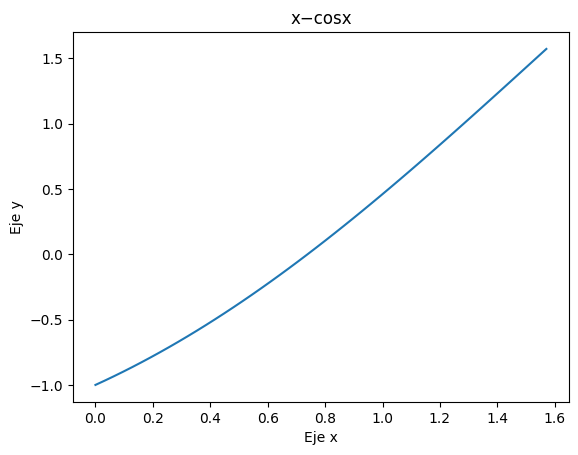

In [ ]:
from math import pi
def f3(x):
  return x-np.cos(x)

#Realizamos la gráfica
x=np.linspace(0,pi/2)
plt.plot(x,f3(x))
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("x−cosx")
plt.show()

In [ ]:
dr= lambda x: 1+ np.sin(x)
valor_real=0.7390851333106
resultados3= {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método de secante", "Método de Ridders"],
    "Resultado": [busqueda_incremental(f3, 0, 1, 1e-3)[0], busquedaBiseccion(f3, 0, 1, 1e-6)[0], newton(f3, dr, 1, 1e-6)[0], secante(f3, 0, 1, 1e-6)[0], Ridders(f3, 0, 1, 1e-6)[0]],
    "Pasos": [busqueda_incremental(f3, 0, 1, 1e-3)[1], busquedaBiseccion(f3, 0, 1, 1e-6)[1], newton(f3, dr, 1, 1e-6)[1], secante(f3, 0, 1, 1e-6)[1], Ridders(f3, 0, 1, 1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}
pd.DataFrame(resultados3)
df_resultados1 = pd.DataFrame(resultados3)

df_resultados1['Error %'] = np.abs(df_resultados1['Resultado'] - valor_real)
# Mostrar el DataFrame
pd.DataFrame(df_resultados1)

,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,0.740000,739,lineal,9.148667e-04
1,Búsqueda Bisección,0.739085,20,lineal,4.126990e-07
2,Método de Newton,0.739085,4,cuadrática,9.543932e-11
3,Método de secante,0.739085,6,superlineal,9.543932e-11
4,Método de Ridders,0.739085,19,cuadrática,9.543921e-11


### 2) Gráfica y raíz de $f(x)=\cos x -x^3$ con una valor inicial de $x_0=0.5$
#### ¿Cuál es el mejor método y el peor método?

Una vez más el mejor método es Newton en términos de eficiencia, mientras que el peor es el de bisección. El argumento es similar a la anterior respuesta.

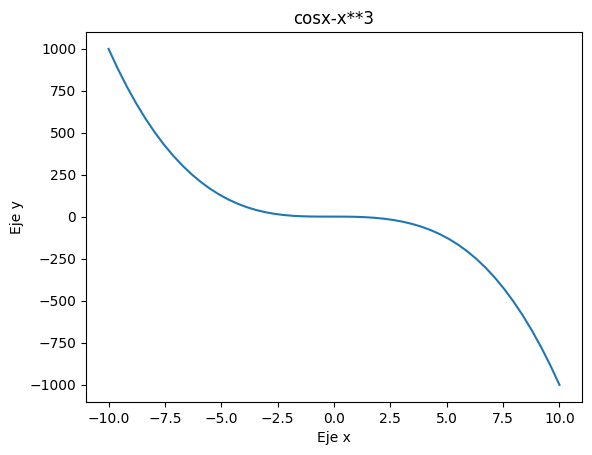

In [ ]:
from math import pi
def f4(x):
  return np.cos(x)-x**3

#Realizamos la gráfica
x=np.linspace(-10,10)
plt.plot(x,f4(x))
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("cosx-x**3")
plt.show()

In [ ]:
dr1= lambda x: -(np.sin(x))-3*x**2
valor_real=0.865474034494
resultados4= {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método de secante", "Método de Ridders"],
    "Resultado": [busqueda_incremental(f4, 0.5, 1, 1e-6)[0], busquedaBiseccion(f4, 0.5, 1, 1e-6)[0], newton(f4, dr1, 1, 1e-6)[0], secante(f4, 0.5, 1, 1e-6)[0], Ridders(f4, 0.5, 1, 1e-6)[0]],
    "Pasos": [busqueda_incremental(f4, 0.5, 1, 1e-6)[1], busquedaBiseccion(f4, 0.5, 1, 1e-6)[1], newton(f4, dr1, 1, 1e-6)[1], secante(f4, 0.5, 1, 1e-6)[1], Ridders(f4, 0.5, 1, 1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}
pd.DataFrame(resultados4)
df_resultados3 = pd.DataFrame(resultados4)

df_resultados3['Error %'] = np.abs(df_resultados3['Resultado'] - valor_real)
# Mostrar el DataFrame
pd.DataFrame(df_resultados3)

,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,0.865475,365474,lineal,9.655165e-07
1,Búsqueda Bisección,0.865474,19,lineal,1.895966e-07
2,Método de Newton,0.865474,4,cuadrática,1.392384e-09
3,Método de secante,0.865474,7,superlineal,1.392386e-09
4,Método de Ridders,0.865474,18,cuadrática,1.392385e-09


### 3) Gráfica y raíz $\tan(\pi x)-6=0$ en $(0,1)$
#### ¿Cuál es el mejor método y el peor método?

Sorprendentemente en comparación de los anteriores resultados el método más efectivo es el de busqueda incremental, en este se presenta el resultado con mayor aproximación y menor error, de tan solo 4.68 e-7 por ciento y el peor es el de la secante en la cual ni siquiera pudimos obtener un valor concreto.

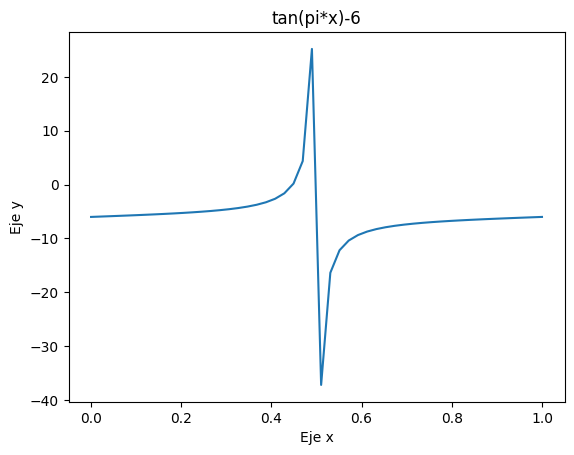

In [ ]:
def f5(x):
  return np.tan(pi*x)-6
#Realizamos la gráfica
x=np.linspace(0,1)
plt.plot(x,f5(x))
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("tan(pi*x)-6")
plt.show()

In [ ]:
from math import pi
dr2= lambda x: pi*(1/np.cos(pi*x))**2
valor_real=0.4474315316288
resultados4= {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método de secante", "Método de Ridders"],
    "Resultado": [busqueda_incremental(f5, 0, 1, 1e-6)[0], busquedaBiseccion(f5, 0, 1, 1e-6)[0], newton(f5, dr2, 1, 1e-6)[0], secante(f5, 0.1, 1, 1e-6)[0], Ridders(f5, 0, 1, 1e-6)[0]],
    "Pasos": [busqueda_incremental(f5, 0, 1, 1e-6)[1], busquedaBiseccion(f5, 0, 1, 1e-6)[1], newton(f5, dr2, 1, 1e-6)[1], secante(f5, 0.1, 1, 1e-6)[1], Ridders(f5, 0, 1, 1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}
pd.DataFrame(resultados4)
df_resultados3 = pd.DataFrame(resultados4)

df_resultados3['Error %'] = np.abs(df_resultados3['Resultado'] - valor_real)
# Mostrar el DataFrame
pd.DataFrame(df_resultados3)

<ipython-input-20-ef56ed80bd16>:2: RuntimeWarning: overflow encountered in scalar multiply
  return np.tan(pi*x)-6
<ipython-input-20-ef56ed80bd16>:2: RuntimeWarning: invalid value encountered in tan
  return np.tan(pi*x)-6


,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,0.447432,447431,lineal,4.683661e-07
1,Búsqueda Bisección,0.500000,0,lineal,5.256847e-02
2,Método de Newton,24.447432,24,cuadrática,2.400000e+01
3,Método de secante,NaN,669,superlineal,NaN
4,Método de Ridders,0.750000,2,cuadrática,3.025685e-01


### 4) Gráfica y raíz de
\begin{equation}
f(x)=\frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}
\end{equation}

#### ¿cuál es el mejor o peor método?
El peor método es el de Newton, ya que la división en un momento dado se hace cero, lo cual causa un gran problema y es imposible continuar con el proceso de recursividad, por tanto, no se obtiene valor alguno. Ahora, el mejor es el método de Ridders, con él, a pesar de realizar casi el doble de pasos en comparación con el método de la secante, su error es básicamente nulo.


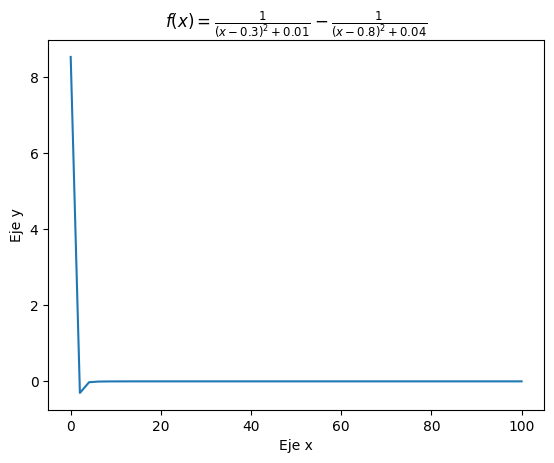

In [ ]:
def f6(x):
  return (1/((x-0.3)**2+0.01))- (1/((x-0.8)**2+0.04))
#Realizamos la gráfica
x=np.linspace(0,100)
plt.plot(x,f6(x))
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"$f(x)=\frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}$")
plt.show()

In [ ]:
dr3 = lambda x: (0.6 - 2*x)/((x - 0.3)**2 + 0.01)**2 - (1.6 - 2*x)/((x - 0.8)**2 + 0.04)**2
newton(f6, dr3, 0.3, 1e-6)[0]

La derivada en el punto actual es cero. No se puede continuar.


TypeError: 'NoneType' object is not subscriptable

In [ ]:
valor_real=0.58
resultados5= {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de secante", "Método de Ridders"],
    "Resultado": [busqueda_incremental(f6, 0, 1, 1e-6)[0], busquedaBiseccion(f6, 0, 1, 1e-6)[0], secante(f6, 0, 1, 1e-6)[0], Ridders(f6, 0, 1, 1e-6)[0]],
    "Pasos": [busqueda_incremental(f6, 0, 1, 1e-6)[1], busquedaBiseccion(f6, 0, 1, 1e-6)[1],secante(f6, 0, 1, 1e-6)[1], Ridders(f6, 0, 1, 1e-6)[1]],
    "Convergencia":["lineal","lineal","superlineal","cuadrática"]
}
pd.DataFrame(resultados5)
df_resultados4 = pd.DataFrame(resultados5)

df_resultados4['Error %'] = np.abs(df_resultados4['Resultado'] - valor_real)
# Mostrar el DataFrame
pd.DataFrame(df_resultados4)

,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,0.580001,580000,lineal,9.999958e-07
1,Búsqueda Bisección,0.580000,20,lineal,4.005432e-07
2,Método de secante,0.580000,10,superlineal,1.110223e-16
3,Método de Ridders,0.580000,19,cuadrática,0.000000e+00


### 5) Gráfica y raíz de $$f(x)=x^4-6.4x^3+6.45x^2+20.538x-31.752$$
#### ¿cuál es el mejor o peor método?

El mejor método podría debatirse entre el de bisección y Ridders. En el de bisección, no realizamos ni un solo paso y su error porcentual es bajo, pero siendo el error más alto en comparación con los demás métodos. Sin embargo, básicamente el tiempo de ejecución es casi nulo. Ahora bien, Ridders tiene una cantidad considerablemente mayor de pasos, pero su error porcentual es menor, hablamos de 1.641543e-07. Por lo tanto, su uso podría dejarse a consideración de cada persona y depender del grado de dificultad del problema.

La búsqueda incremental, una vez más, es el peor método al tener una cantidad de pasos enorme de 2099999 y un error numérico de 6.037082e-11, por lo tanto, se queda con el lugar nuevamente del peor método.

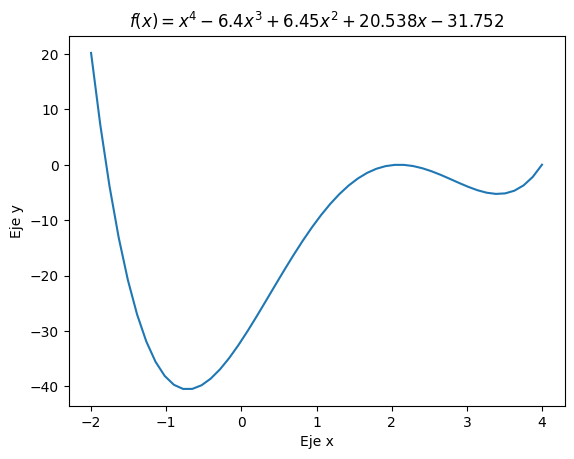

In [ ]:
def f7(x):
  return x**4-6.4*x**3+6.45*x**2+20.538*x-31.752
#Realizamos la gráfica
x=np.linspace(-2,4)
plt.plot(x,f7(x))
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"$f(x)=x^4-6.4x^3+6.45x^2+20.538x-31.752$")
plt.show()

In [ ]:
dr4= lambda x: 4*x**3-19.2*x**2+12.9*x+20.538
valor_real=2.1
resultados6= {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método de secante", "Método de Ridders"],
    "Resultado": [busqueda_incremental(f7, 0, 3, 1e-6)[0], busquedaBiseccion(f7, 1, 3, 1e-6)[0], newton(f7, dr4, 3, 1e-6)[0], secante(f7, 1, 2, 1e-6)[0], Ridders(f7, 2, 1, 1e-6)[0]],
    "Pasos": [busqueda_incremental(f7, 0, 3, 1e-6)[1], busquedaBiseccion(f7, 1, 3, 1e-6)[1], newton(f7, dr4, 3, 1e-6)[1], secante(f7, 1, 2, 1e-6)[1], Ridders(f7, 2, 1, 1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}
pd.DataFrame(resultados6)
df_resultados5 = pd.DataFrame(resultados6)

df_resultados5['Error %'] = np.abs(df_resultados5['Resultado'] - valor_real)
# Mostrar el DataFrame
pd.DataFrame(df_resultados5)

,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,2.100000,2099999,lineal,6.037082e-11
1,Búsqueda Bisección,2.000000,0,lineal,1.000000e-01
2,Método de Newton,2.100001,19,cuadrática,7.188359e-07
3,Método de secante,2.099999,25,superlineal,8.031486e-07
4,Método de Ridders,2.100000,27,cuadrática,1.641543e-07


### 6) Gráfica y raíz de $$y =  x^2 − 2x + sin(x)cos(x) - 3$$
#### ¿Cuál es el mejor y el peor método?

El mejor método es newton porque se realizan la menor cantidad de pasos y además su error porcentual es el más bajo.
El peor método es busqueda incremental, tiene un error porcentual decente pero el exceso de pasos la convierte en el método menos eficaz.



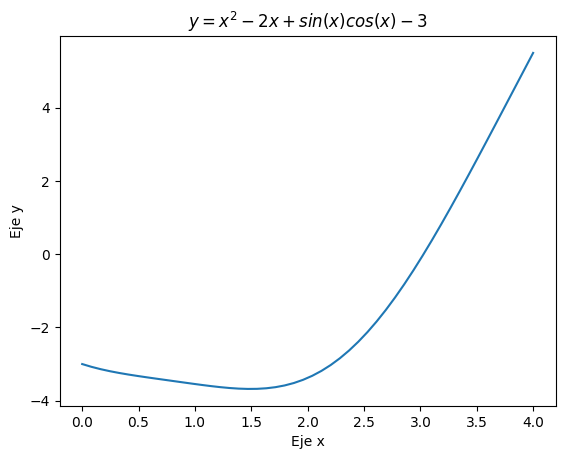

In [ ]:
def f8(x):
  return x**2-2*x+np.sin(x)*np.cos(x)-3
#Realizamos la gráfica
x=np.linspace(0,4)
plt.plot(x,f8(x))
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"$y =  x^2 − 2x + sin(x)cos(x) - 3$")
plt.show()

In [ ]:
dr4= lambda x: 2*x-2+cos(2*x)
valor_real=3.027967004939
resultados6= {
    "Método": ["Busqueda Incremental", "Búsqueda Bisección", "Método de Newton", "Método de secante", "Método de Ridders"],
    "Resultado": [busqueda_incremental(f8, 0, 4, 1e-6)[0], busquedaBiseccion(f8, 0, 4, 1e-6)[0], newton(f8, dr4, 4, 1e-6)[0], secante(f8, 0, 4, 1e-6)[0], Ridders(f8, 0, 4, 1e-6)[0]],
    "Pasos": [busqueda_incremental(f8, 0, 4, 1e-6)[1], busquedaBiseccion(f8, 0, 4, 1e-6)[1], newton(f8, dr4, 4, 1e-6)[1], secante(f8, 0, 4, 1e-6)[1], Ridders(f8, 0, 4, 1e-6)[1]],
    "Convergencia":["lineal","lineal","cuadrática","superlineal","cuadrática"]
}
pd.DataFrame(resultados6)
df_resultados5 = pd.DataFrame(resultados6)

df_resultados5['Error %'] = np.abs(df_resultados5['Resultado'] - valor_real) #absoluto
# Mostrar el DataFrame
pd.DataFrame(df_resultados5)

,Método,Resultado,Pasos,Convergencia,Error %
0,Busqueda Incremental,3.027968,3027967,lineal,9.951303e-07
1,Búsqueda Bisección,3.027967,22,lineal,2.877323e-08
2,Método de Newton,3.027967,4,cuadrática,1.080913e-12
3,Método de secante,3.027967,10,superlineal,1.080913e-12
4,Método de Ridders,3.027967,21,cuadrática,1.080469e-12


## 5. TEMPERATURA CRÍTICA

El potencial de un campo escalar real con rompimiento espontáneo de simetría (cf. Mecanismo de Higgs) es
$$
V(\phi) = -\frac{1}{2}m^2\phi^2+\frac{\lambda}{4!}\phi^4,
$$
que tiene la forma de ``sombrero mexicano'' donde hay un mínimo degenerado en $\phi = \pm\sqrt{6m^2/\lambda}$. Este fenómeno (el mínimo ya no está en cero, como pasaría si $m^2\rightarrow -m^2$) está asociado con el rompimiento espontáneo de la simetría. Sin embargo, cuando se toman en cuenta efectos térmicos, la simetría puede ser restaurada (el mínimo puede regresar a $\phi=0$). El potencial con contribuciones térmicas es
\begin{align*}
    V^\beta(\phi) &= -\frac{m^2}{2}\phi^2+\frac{\lambda}{4!}\phi^4+\frac{7\lambda m^2 \phi^2}{128\pi^2}-\frac{3}{4}\frac{\lambda \phi^4}{128\pi^2}-
    \frac{1}{64\pi^2}M^4\left[\ln\left(\frac{2m^2}{16\pi^2 T^2}\right)-\frac{3}{2}+2\gamma_E\right] \\
    &\qquad \qquad -\frac{\pi^2 T^4}{90}+\frac{M^2 T^2}{24}-\frac{M^3_\text{eff}T}{12\pi}-\frac{m^2\lambda(1+\gamma_E)}{32\pi^2}\phi^2+\frac{T\lambda}{16\pi}\phi^2\sqrt{\frac{T^2\lambda}{24}-m^2}-\\
    &\qquad \qquad \frac{m^2\lambda}{64\pi^2}\ln\left(\frac{m^2}{8\pi^2T^2}\right)\phi^2,
\end{align*}
donde $M=(\frac{\lambda}{2}\phi^2-m^2)^{1/2}$, $M_\text{eff}=(M^2+\frac{\lambda T^2}{24})^{1/2}$ y $\gamma_E$ es la Gamma de Euler.

En la Figura se ha graficado $V^\beta(\phi)-V^\beta(0)$. Para temperaturas por encima de $T_1=\sqrt{24m^2/\lambda}$, el potencial es completamente real. Para temperaturas $T_1 < T < T_c$, el mínimo del potencial se va acercando de manera continua al origen. A una temperatura crítica $T_c$, hay un mínimo degenerado en el origen y fuera de él, dando lugar a una transición de fase de primer orden. Por encima de la temperatura crítica $T_c$, el mínimo global se mueve de forma discontinua al origen mostrando la restauración de la simetría. Encuentra la temperatura crítica cuando $\lambda=1$ y  $m^2=600$. (Hint: La temperatura crítica estará cerca de $T_1=120$.)



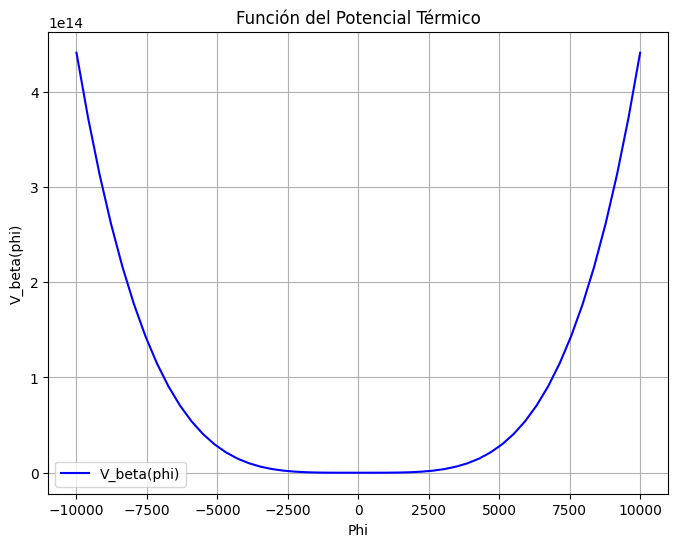

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros
m2 = 600
lmbda = 1
gamma_E = 0.5772156649  # Gamma de Euler
T = np.sqrt(24 * m2 / lmbda)

# Definir la función del potencial térmico
def V_beta(phi):
    M = np.sqrt((lmbda / 2) * phi**2 - m2)
    M_eff = np.sqrt(M**2 + lmbda * T**2 / 24)
    a = (7 * lmbda * m2 * phi**2) / (128 * np.pi**2) - (3/4)*(( lmbda * phi**4) / (128 * np.pi**2))- (1/(64 * np.pi**2)) * M**4 * (np.log(2 * m2 / (16 * np.pi**2 * T**2)) - (3/2) + 2 * gamma_E)

    b= -((np.pi**2 * T**4) / 90) + ((M**2*T**2)/24)- (M_eff**3 * T) / (12 * np.pi) - (m2 * lmbda * (1 + gamma_E)) / (32 * np.pi**2) * phi**2
    c = (T * lmbda) / (16 * np.pi) * phi**2 * np.sqrt((T**2 * lmbda) / 24 - m2)
    d = -(m2 * lmbda) / (64 * np.pi**2) * np.log(m2 / (8 * np.pi**2 * T**2)) * phi**2
    return -0.5 * m2 * phi**2 + (lmbda / 24) * phi**4 + a + b + c + d

# Crear un rango de valores para phi
phi_val = np.linspace(-10000,10000)

# Calcular los valores de V_beta para cada valor de phi
V_val = V_beta(phi_val)

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(phi_val, V_val, color='blue', label='V_beta(phi)')
plt.title('Función del Potencial Térmico')
plt.xlabel('Phi')
plt.ylabel('V_beta(phi)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
m2=600
lmbda= 1
gamma_E = 0.5772156649  # Gamma de Euler
T = sqrt(24 * m2 / lmbda)
def derivada_V_beta(phi):
  return -m2 * phi+ (lmbda / 6) * phi**3+(7 * lmbda * m2 * phi) / (64 * pi**2) - (3)*(( lmbda * phi**3) / (128 * pi**2))- (1/(64 * pi**2)) * (lmbda**2*phi**2) * (log(2 * m2 / (16 * pi**2 * T**2)) - (3/2) + 2 * gamma_E)+((lmbda*phi*T**2)/24)-(4*T*phi**3)/(3*pi*lmbda**3)-((m2*lmbda*(1+gamma_E))/(16*pi**2))*phi+(T*lmbda/(8*pi))*phi*sqrt(((T**2*lmbda)/24)-m2)-(m2*lmbda/(32*pi**2))*log(m2/(8*pi**2*T**2))*phi

In [ ]:
busquedaBiseccion(derivada_V_beta,0,T*2,1e-4)

(200.0, 0)

In [ ]:
#Definimos las constantes a usar
from math import pi,sqrt,log
m2=600
lmbda= 1
gamma_E = 0.5772156649  # Gamma de Euler
phi= 200


# Definir la función del potencial térmico
def V_beta1(T):
    M = np.sqrt((lmbda / 2) * phi**2 - m2)
    M_eff = np.sqrt(M**2 + lmbda * T**2 / 24)
    a = (7 * lmbda * m2 * phi**2) / (128 * pi**2) - (3/4)*(( lmbda * phi**4) / (128 * pi**2))- (1/(64 * pi**2)) * M**4 * (log(2 * m2 / (16 * pi**2 * T**2)) - (3/2) + 2 * gamma_E)

    b= -((pi**2 * T**4) / 90) + ((M**2*T**2)/24)- (M_eff**3 * T) / (12 * pi) - (m2 * lmbda * (1 + gamma_E)) / (32 * pi**2) * phi**2
    c = (T * lmbda) / (16 * pi) * phi**2 * sqrt((T**2 * lmbda) / 24 - m2)
    d = -(m2 * lmbda) / (64 * pi**2) * log(m2 / (8 * pi**2 * T**2)) * phi**2
    return -0.5 * m2 * phi**2 + (lmbda / 24) * phi**4 + a + b + c + d








In [ ]:
print("La temperatura crítica es:",secante(V_beta1,121,122,1e-5)[0])

La temperatura crítica es: 158.8562355749538


###Explicación
Llevo rato intentando resolver el problema, incluso desde hace algunos días. Si me retrasé en la entrega de esta tarea, seguro fue por este ejercicio. Intentaré explicar mi procedimiento, ya que el código no está de mi lado y seguro hay algún error sutil que no veo.

Al querer encontrar una $T_c$, el potencial $V_\beta(\phi)$ a temperatura constante $T_1$ es derivado primeramente con la finalidad de encontrar un mínimo. Esta derivada se iguala a cero, es decir, $\frac{dV_\beta}{d \phi}=0$. Cuando se resuelve, se encuentra una $\phi_c$. Ahora, esa $\phi_c$ es sustituida nuevamente en la expresión del potencial con contribuciones térmicas. Así, nuestra función dependerá de $T$, $V_\beta(T)$. Usamos algún método para encontrar raíces y ese resultado será la temperatura crítica buscada, $T_c$.

## 6. LAGRANGE

Sea f(x) = 2 sin($\frac{πx}{6}$) (con el ángulo medido en radianes).

a) Usa el polinomio de Lagrangre con nodos x0 = 0, x1 = 1 y x2 = 3 para aproximar f(2) y f(2.4).

b) Usa el polinomio de Lagrangre con nodos x0 = 0, x1 = 1, x2 = 3 y x3 = 5 para aproximar f(2) y f(2.4).

c) Usa el polinomio de Lagrangre con nodos x0 = 0, x1 = 1 y x2 = 3 para aproximar f(4) y f(3.5).

d) Usa el polinomio de Lagrangre con nodos x0 = 0, x1 = 1, x2 = 3 y x3 = 5 para aproximar f(4) y f(3.5).

### inciso a)

In [ ]:
def Lagrange(x, X, Y):
    L = []
    P = 0
    for i in range(len(X)): #indice lento
        l = 1
        for j in range(len(X)):
            if i != j: #ortonormalidad
                l *= (x - X[j]) / (X[i] - X[j]) #indice rápido
        L.append(l)
    for j in range(len(X)):
        P += Y[j] * L[j]
    return P



In [ ]:
import numpy as np
from math import pi
def g(x):
  return 2* np.sin(pi*x/6)

In [ ]:
c=Lagrange(2,[0, 1, 3],[g(0),g(1),g(3)])
d=Lagrange(2.4,[0, 1, 3],[g(0),g(1),g(3)])
print("El valor de f(2) es:", c, "\nEl valor de f(2.4) es:", d)

El valor de f(2) es: 1.6666666666666665 
El valor de f(2.4) es: 1.8399999999999999


### inciso b)

In [ ]:
c1=Lagrange(2,[0, 1, 3, 5],[g(0),g(1),g(3),g(5)])
d1=Lagrange(2.4,[0, 1, 3, 5],[g(0),g(1),g(3),g(5)])
print("El valor de f(2) es:", c1, "\nEl valor de f(2.4) es:", d1)

El valor de f(2) es: 1.7 
El valor de f(2.4) es: 1.8736


### inciso c) Usa el polinomio de Lagrangre con nodos x0 = 0, x1 = 1 y x2 = 3 para aproximar f(4) y f(3.5).

In [ ]:
c2=Lagrange(4,[0, 1, 3],[g(0),g(1),g(3)])
d2=Lagrange(3.5,[0, 1, 3],[g(0),g(1),g(3)])
print("El valor de f(4) es:", c2, "\nEl valor de f(3.5) es:", d2)

El valor de f(4) es: 2.0 
El valor de f(3.5) es: 2.041666666666667


### d) Usa el polinomio de Lagrangre con nodos x0 = 0, x1 = 1, x2 = 3 y x3 = 5 para aproximar f(4) y f(3.5).

In [ ]:
c3=Lagrange(4,[0, 1, 3, 5],[g(0),g(1),g(3), g(5)])
d3=Lagrange(3.5,[0, 1, 3, 5],[g(0),g(1),g(3), g(5)])
print("El valor de f(4) es:", c3, "\nEl valor de f(3.5) es:", d3)

El valor de f(4) es: 1.8 
El valor de f(3.5) es: 1.96875


## 7. Más Lagrange
Se desea aproximar la función $f(x)= arctan(x)$ en el intervalo [0, 4]. Los datos que se conocen son:
x = {0, 1, 2, 4} cuyos respectivos valores son f(x) = {0, 0.785, 1.107, 1.325}. Usa el polinomio de Lagrange para aproximar f(3) y f(1.5).

In [ ]:
a=Lagrange(3,[0, 1, 2, 4],[0, 0.785, 1.107, 1.325])
b=Lagrange(1.5,[0, 1, 2, 4],[0, 0.785, 1.107, 1.325])
print("El valor de f(3) es:", a, "\nEl valor de f(1.5) es:", b)

El valor de f(3) es: 1.2067499999999998 
El valor de f(1.5) es: 0.988828125
